## Files with AIMA functions

Files `search.py` and `utils.py` are downloaded from AIMA Python code repository. They are used to implement the search algorithms in this notebook. The class `Node` has 2 additional attributes:

- `expanded_nodes`: number of nodes expanded during the search.
- `frontier_nodes`: number of nodes in the frontier at the end of the search.

Also, the algorithms `breadth_first_graph_search`, `depth_first_graph_search` and `best_first_graph_search` have been modified to modify the `expanded_nodes` and `frontier_nodes` attributes of the solution nodes.


In [1]:
# Import search algorithms
from search import depth_first_graph_search, breadth_first_graph_search, astar_search

# Import functions that facilitate the representation of the path to the solution
from functions import (
    MinningProblem,
    read_input_file,
    run_search_algorithm,
    run_experiments,
    print_tables,
    get_states_h2,
    plot_path_in_map,
)

## Reading the input

The function `read_input_file` reads the input file and returns the number of rows, columns, the initial state and the goal state.


In [2]:
n_rows, n_cols, map_costs, initial, goal = read_input_file("../data/exampleMap.txt")
print(f"Number of rows: {n_rows}")
print(f"Number of columns: {n_cols}")
print(f"Map costs: {map_costs}")
print(f"Initial position: {initial}")
print(f"Goal position: {goal}")

Number of rows: 3
Number of columns: 4
Map costs: [[3, 2, 4, 1], [2, 3, 1, 2], [1, 4, 2, 3]]
Initial position: (0, 3, 0)
Goal position: (1, 2, 8)


## Definition of the problem

We extend the class `Problem` implemented by AIMA to define the problem for this task, called: `MinningProblem`. To achieve this, we define the following methods:

- `__init__(self, initial, goal)`: This method initializes the problem with the initial state and the goal state.
- `goal_test(self, state)`: This method checks if a given state is valid, taking into account the number of rows and columns of the problem.
- `actions(self, state)`: This method returns the possible actions that can be taken from a given state. The possible actions are `rotate_left`, `rotate_right`, `move_forward`.
- `result(self, state, action)`: This method returns the state that results from taking an action from a given state.
- `path_cost(self, c, state1, action, state2)`: This method returns the cost of the path from the `state1` to `state2` taking the action `action`. The cost is calculated as the sum of the cost of the action and the cost of the state.
- `h(self, node)`: This method returns the heuristic value of a given node.


In [3]:
n_rows, n_cols, map_costs, initial, goal = read_input_file("../data/exampleMap.txt")
mp = MinningProblem(n_rows, n_cols, map_costs, initial, goal)
[mp.result(initial, action) for action in mp.actions(initial)]

[(0, 3, 7), (0, 3, 1)]

## Trying the search algorithms


The value returned by the algorithms functions is the solution node. It is possible to get the path from the initial state to the goal state by using the method `solution()`. The method `solution()` returns a list with the path from the initial state to the goal state. With the function `path()` it is possible to get the actions performed to reach the goal state.


In [4]:
sol = breadth_first_graph_search(mp)
print(f"Cost of the solution: {sol.path_cost}")
print(f"Number of actions: {len(sol.path())}")
print(f"Actions: {sol.solution()}")
print(f"States: {[node.state for node in sol.path()]}")

Cost of the solution: 4
Number of actions: 5
Actions: ['rotate_left', 'rotate_left', 'rotate_left', 'move_forward']
States: [(0, 3, 0), (0, 3, 7), (0, 3, 6), (0, 3, 5), (1, 2, 5)]


The function `run_search_algorithm()` receives the search algorithm and the problem as parameters and returns the solution node, the path and the actions performed to reach the goal state. It has the options:

- `algorithm`: The search algorithm to be used. It can be one of the following: `depth_first_graph_search`, `breadth_first_graph_search`, `best_first_graph_search`, `astar_search`, or any other algorithm implemented by AIMA.
- `problem`: The problem to be solved.
- `verbose`: If `True`, it prints the path and the actions performed to reach the goal state.
- `output_file`: If different from `None`, it writes the path and the actions performed to reach the goal state in a file with the name given by the parameter.


In [5]:
sol_bfs = run_search_algorithm(mp, breadth_first_graph_search, verbose=True)
sol_dfs = run_search_algorithm(mp, depth_first_graph_search, verbose=False)
sol_astar = run_search_algorithm(mp, astar_search, verbose=False)


#############################################
Running breadth_first_graph_search algorithm
#############################################

State 0: (0, 3, 0) (starting node)
Action 1: rotate_left
State 1: (0, 3, 7)
Action 2: rotate_left
State 2: (0, 3, 6)
Action 3: rotate_left
State 3: (0, 3, 5)
Action 4: move_forward
State 4: (1, 2, 5) (final node)

Total number of items in explored list: 6
Total number of items in frontier: 3



## Running experiments

We have a function called `run_experiments` that runs the search algorithms for a given problem and returns solution nodes for each problem for algorithms: `breadth_first_graph_search`, `best_first_graph_search`, `astar_search` (with the 2 heuristics). This data is returned in a data strucuture that consists on a `list` that contains one`dictionary` for each algorithm. Each`dictionary`contains the 10 solutions for the 10 different maps of each size (3, 5, 7, 9) of each algorithm. The keys of the`dictionary` are the names of the maps and the values are the solutions returned by the algorithms.

The function `print_tables` receives the data returned by the function `run_experiments` and prints the tables with the results of the experiments. The tables show the **depth of the solution (d)**, the **path cost (g)**, the **number of nodes expanded (#E)** and the **number of nodes in the frontier at the end of the search (#F)** for each algorithm and each map size.


In [6]:
results = run_experiments(map_sizes=[3, 5, 7, 9], seed=42)
print_tables(results, map_sizes=[3, 5, 7, 9], style="markdown")


#### Comparative table of performance of search methods in the map of dimension 3
|               |   d |    g |   #E |   #F |
|:--------------|----:|-----:|-----:|-----:|
| Breadth-first | 5   | 11.9 | 10   |  6   |
| Depth-first   | 8   | 19.8 |  8   |  8   |
| A* (h1)       | 5.4 | 11.1 | 28.5 |  8.9 |
| A* (h2)       | 5.4 | 11.1 | 19.5 | 10.1 |

#### Comparative table of performance of search methods in the map of dimension 5
|               |    d |    g |    #E |   #F |
|:--------------|-----:|-----:|------:|-----:|
| Breadth-first |  7   | 23.4 |  33   | 28   |
| Depth-first   | 12   | 38.5 |  12   | 16   |
| A* (h1)       | 11.2 | 19.9 | 122.6 | 24.3 |
| A* (h2)       | 11.2 | 19.9 |  93.6 | 31.8 |

#### Comparative table of performance of search methods in the map of dimension 7
|               |    d |    g |    #E |   #F |
|:--------------|-----:|-----:|------:|-----:|
| Breadth-first |  9   | 35.7 | 106   | 59   |
| Depth-first   | 16   | 61.1 |  16   | 24   |
| A* (h1)  

### Results

#### Comparative table of performance of search methods in the map of dimension 3

|               |   d |    g |   #E |   #F |
| :------------ | --: | ---: | ---: | ---: |
| Breadth-first |   5 | 11.9 |   10 |    6 |
| Depth-first   |   8 | 19.8 |    8 |    8 |
| A\* (h1)      | 5.4 | 11.1 | 28.5 |  8.9 |
| A\* (h2)      | 5.4 | 11.1 | 19.5 | 10.1 |

#### Comparative table of performance of search methods in the map of dimension 5

|               |    d |    g |    #E |   #F |
| :------------ | ---: | ---: | ----: | ---: |
| Breadth-first |    7 | 23.4 |    33 |   28 |
| Depth-first   |   12 | 38.5 |    12 |   16 |
| A\* (h1)      | 11.2 | 19.9 | 122.6 | 24.3 |
| A\* (h2)      | 11.2 | 19.9 |  93.6 | 31.8 |

#### Comparative table of performance of search methods in the map of dimension 7

|               |    d |    g |    #E |   #F |
| :------------ | ---: | ---: | ----: | ---: |
| Breadth-first |    9 | 35.7 |   106 |   59 |
| Depth-first   |   16 | 61.1 |    16 |   24 |
| A\* (h1)      | 13.7 | 25.7 | 229.9 | 49.2 |
| A\* (h2)      | 13.5 | 25.7 | 179.2 | 56.1 |

#### Comparative table of performance of search methods in the map of dimension 9

|               |    d |    g |    #E |   #F |
| :------------ | ---: | ---: | ----: | ---: |
| Breadth-first |   11 | 34.4 |   242 |   91 |
| Depth-first   |   20 | 68.7 |    20 |   32 |
| A\* (h1)      | 15.8 | 27.5 | 349.1 | 73.9 |
| A\* (h2)      | 15.8 | 27.5 |   269 | 84.6 |


---
# Functions to plot information for the report
---


## Function to find the actions and path obtained with h2

This is only necessary to plot a matrix and the path to write the report. We elaborate a function to find the positions and the orientations of the robot in the path obtained with the heuristic h2. The goal is to plot the path in a matrix to see how work this heuristic and to proof that h2 is admissible.


In [7]:
h2_cost, states = get_states_h2((1, 1, 3), (2, 3, 8))
states

[(1, 1, 3), (2, 2, 3), (2, 2, 2), (2, 3, 2)]

## Plot the robot in the map and the path followed

Maybe this is useful to write the explanation of the heuristics in the report. Also it can be used to represent the path followed by the robot with the different search algorithms.


### Plot the path followed by the heuristic h2


Cost of heuristic 2: 6
States: [(0, 0, 0), (0, 0, 2), (0, 1, 2), (0, 1, 3), (1, 2, 3), (2, 3, 3)]


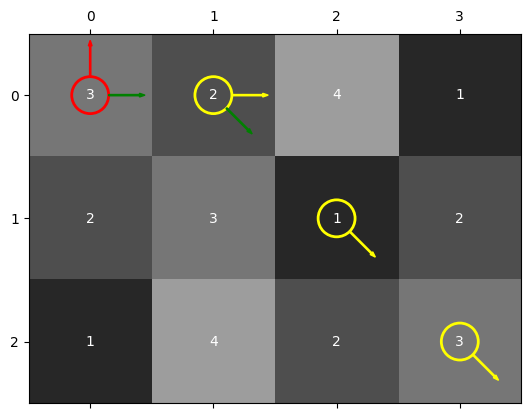

In [8]:
import numpy as np

_, _, map_data, _, _ = read_input_file("../data/exampleMap.txt")
initial_state = (0, 0, 0)
goal_state = (2, 3, 8)
h2_cost, states = get_states_h2(initial_state, goal_state)
print(f"Cost of heuristic 2: {h2_cost}")
print(f"States: {states}")
plot_path_in_map(
    np.array(map_data),
    initial_state=states[0],
    states=states,
)

### Plot the path followed by the robot with the different search algorithms

The function `plot_path_in_map` it can be used also to plot the path followed by the robot with the different search algorithms. I tonly needs the initial state and the list of states that the robot has passed through. It will print the initial position and orientation of the robot in **red**, the rotation movements in **green** and the movements in **yellow**.


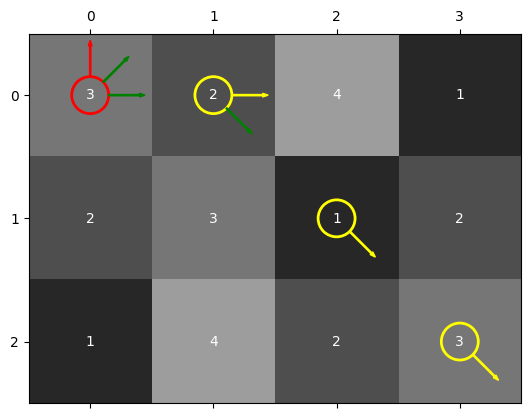

In [9]:
n_rows, n_cols, map_data, _, _ = read_input_file("../data/exampleMap.txt")
initial_state = (0, 0, 0)
goal_state = (2, 3, 8)
mp = MinningProblem(n_rows, n_cols, map_data, initial_state, goal_state)
sol = run_search_algorithm(mp, breadth_first_graph_search, verbose=False)
# Get the states of the solution
states = [node.state for node in sol.path()]  # we need to unpack the state
plot_path_in_map(
    np.array(map_data),
    initial_state=states[0],
    states=states,
)